In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

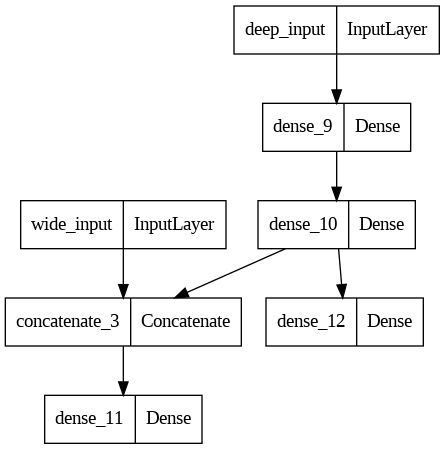

In [ ]:
input_a = tf.keras.layers.Input(shape=(1,), name="deep_input")
input_b = tf.keras.layers.Input(shape=(1,), name="wide_input")
hidden_1 = tf.keras.layers.Dense(32, activation="relu")(input_a)
hidden_2 = tf.keras.layers.Dense(32, activation="relu")(hidden_1)
concatenate = tf.keras.layers.concatenate([hidden_2, input_b])
output_a = tf.keras.layers.Dense(1)(concatenate)
output_b = tf.keras.layers.Dense(1)(hidden_2)
model = tf.keras.Model(inputs=[input_a, input_b],
                       outputs=[output_a, output_b])

plot_model(model)


## Model api

In [ ]:
class SimpleModel(tf.keras.Model):
  def __init__(self, units=32, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.hidden_1 = tf.keras.layers.Dense(units=units, activation=activation)
    self.hidden_2 = tf.keras.layers.Dense(units=units, activation=activation)
    self.output_a = tf.keras.layers.Dense(1)
    self.output_b = tf.keras.layers.Dense(1)

  def call(self, inputs):
    input_a, input_b = inputs
    hidden_1 = self.hidden_1(input_a)
    hidden_2 = self.hidden_2(hidden_1)
    output_a = self.output_a(hidden_2)
    concat = tf.keras.layers.concatenate([hidden_2, input_b])
    output_b = self.output_b(self.concat)
    return output_a, output_b

In [ ]:
model = SimpleModel()

In [ ]:
class CNNResidual(tf.keras.layers.Layer):
  def __init__(self, layers, filters, **kwargs):
    super().__init__(**kwargs)
    self.hidden = [tf.keras.layers.Conv2D(filters=filters, kernel_size=(3, 3), activation="relu") for _ in range(layers)]

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)

    return inputs + x

In [ ]:
class DNNResidual(tf.keras.layers.Layer):
  def __init__(self, layers, units=32, **kwargs):
    super().__init__(**kwargs)
    self.hidden = [tf.keras.layers.Dense(units=units, activation="relu") for _ in range(layers)]

  def call(self, inputs):
    x = inputs
    for layer in hidden:
      x = layer(x)

    return inputs + x

In [ ]:
class MyResidual(tf.keras.Model):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.hidden_1 = tf.keras.layers.Dense(30, activation="relu")
    self.cnn_residual = CNNResidual(layers=2, filters=32)
    self.dnn_residual = DNNResidual(layers=2, units=32)
    self.hidden_2 = tf.keras.layers.Dense(1)

  def call(self, inputs):
    x = self.hidden_1(inputs)
    x = self.cnn_residual(x)
    for _ in range(3):
      x = self.dnn_residual(x)

    return self.hidden_2(x)

In [ ]:
model = MyResidual()

In [ ]:
class IdentityBlock(tf.keras.Model):
  def __init__(self, filters, kernel_size, **kwargs):
    super().__init__(**kwargs)
    self.conv1 = tf.keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, padding="same")
    self.b_norm1 = tf.keras.layers.BatchNormalization()

    self.conv2 = tf.keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, padding="same")
    self.b_norm2 = tf.keras.layers.BatchNormalization()

    self.act = tf.keras.layers.Activation('relu')
    self.add = tf.keras.layers.Add


  def call(self, inputs):
    x = inputs
    x = self.conv1(x)
    x = self.b_norm1(x)
    x = self.act(x)

    x = self.conv2(x)
    x = self.b_norm2(x)
    x = self.act(x)

    x = self.add([x, inputs])
    return x


In [ ]:
class MiniResNet(tf.keras.Model):
  def __init__(self, num_classes, **kwargs):
    super().__init__(**kwargs)
    self.conv = tf.keras.layers.Conv2D(filters=64, kernel_size=7, padding="same")
    self.bn = tf.keras.layers.BatchNormalization()
    self.mp = tf.keras.layers.MaxPool2D((3, 3))
    self.act = tf.keras.layers.Activation('relu')
    self.global_pool = tf.keras.layers.GlobalAveragePooling2D()
    self.id1 = IdentityBlock(filters=64, kernel_size=(3, 3))
    self.id2 = IdentityBlock(64, 3)
    self.clf = tf.keras.layers.Dense(num_classes, activation="softmax")

  def call(self, inputs):
    x = self.conv(inputs)
    x = self.bn(x)
    x = self.act(x)
    x = self.mp(x)

    x = self.id1(x)
    x = self.id2(x)

    x = self.global_pool(x)

    return self.clf(x)

In [ ]:
resnet = MiniResNet(10)


In [12]:
import tensorflow as tf
import tensorflow_datasets as tfds

class IdentityBlock(tf.keras.Model):
  def __init__(self, filter, kernel_size, **kwargs):
    super().__init__(**kwargs)
    self.conv1 = tf.keras.layers.Conv2D(filter, kernel_size, padding="same")
    self.bn1 = tf.keras.layers.BatchNormalization()

    self.conv2 = tf.keras.layers.Conv2D(filter, kernel_size, padding="same")
    self.bn2 = tf.keras.layers.BatchNormalization()

    self.act = tf.keras.layers.Activation('relu')
    self.add = tf.keras.layers.Add()

  def call(self, inputs):
    x = self.conv1(inputs)
    x = self.bn1(x)
    x = self.act(x)

    x = self.conv2(inputs)
    x = self.bn2(x)
    x = self.act(x)

    x = self.add([x, inputs])
    x = self.act(x)
    return x

class ResNet(tf.keras.Model):
  def __init__(self, num_classes, **kwargs):
    super().__init__(**kwargs)
    self.conv = tf.keras.layers.Conv2D(64, 7, padding="same")
    self.bn = tf.keras.layers.BatchNormalization()
    self.act = tf.keras.layers.Activation('relu')

    self.max_pool = tf.keras.layers.MaxPooling2D((3, 3))
    self.id1 = IdentityBlock(64, 3)
    self.id2 = IdentityBlock(64, 3)

    self.global_pool = tf.keras.layers.GlobalAveragePooling2D()
    self.clf = tf.keras.layers.Dense(num_classes, activation="softmax")

  def call(self, inputs):
    x = self.conv(inputs)
    x = self.bn(x)
    x = self.act(x)
    x = self.max_pool(x)

    x = self.id1(x)
    x = self.id2(x)
    x = self.global_pool(x)
    x = self.clf(x)

    return x

In [13]:
model = ResNet(10)

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [15]:
def preprocess(features):
  return tf.cast(features["image"], dtype=tf.float32)/255.0, features["label"]

dataset = tfds.load('mnist', split=tfds.Split.TRAIN)
dataset = dataset.map(preprocess).batch(32)

In [ ]:
model.fit(dataset, epochs=1)

 571/1875 [========>.....................] - ETA: 2:11 - loss: 0.4914 - accuracy: 0.8952